# Project 1 - Exploratory Data Analysis for Machine Learning
This notebook is a part of my first project required by IBM Machine Learning Program.

Data source: [Board Games - Tidy Tuesday](https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-03-12)

In this notebook, I will clean the data and explore the relationship between the target (game average rating) and potential predictors. I will also construct new features from the existing data when possible and perform hypothesis tests.

Notebook Contents:
> 1. Data Overview
> 2. Data Cleaning and Feature Engineering: Categorical Data
> 3. Data Cleaning and Feature Engineering: Numeric Data
> 4. Hypothesis Testing

## 1. Data Overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#%config InlineBackend.figure_formats = ['retina']

In [2]:
# Load in the dataset
data = pd.read_csv('board_games.csv')

In [3]:
# Create train set and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [4]:
# First look
train.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
6168,41933,"In the year 2097, the entire Earth was envelop...",//cf.geekdo-images.com/images/pic1114682.jpg,5,60,12,2,45,Arctic Scavengers,60,...,"Matt Burton,Martin Hoffmann","Bluffing,Card Game,Fighting",Arctic Scavengers: Base Game+HQ+Recon,Robert K. Gabhart,"Arctic Scavengers: HQ,Arctic Scavengers: Recon","Arctic Scavengers,Arctic Theme","Card Drafting,Deck / Pool Building,Hand Manage...","Driftwood Games,Rio Grande Games,Ystari Games",6.97479,2182
9652,173090,Players in The Game try to discard all 98 card...,//cf.geekdo-images.com/images/pic2405167.jpg,5,20,8,1,20,The Game,20,...,"Oliver Freudenreich,Sandra Freudenreich","Card Game,Number",The Game on Fire (compilation),Steffen Benndorf,The Game on Fire (expansion),Solitaire Games,"Co-operative Play,Hand Management","Nürnberger-Spielkarten-Verlag,dV Giochi,Game F...",6.75647,3480
5007,25224,"In a distant land, many and many years ago, ro...",//cf.geekdo-images.com/images/pic143036.jpg,5,120,12,2,90,Hermagor,120,...,Czarnè,"Economic,Medieval,Transportation",NaN,Emanuele Ornella,NaN,NaN,"Area Control / Area Influence,Auction/Bidding,...","Mind the Move,Quined White Goblin Games,Rio Gr...",6.92051,1643
7409,103843,Game description from the publisher:&#10;&#10;...,//cf.geekdo-images.com/images/pic1054173.jpg,6,30,8,2,30,Fandooble,30,...,Fian Arroyo,Fantasy,NaN,Mike Richie,NaN,Animals: Dragons,"Dice Rolling,Press Your Luck",Mindtwister USA,6.09375,80
3030,6946,Strategy &amp; Tactics magazine #47.&#10;&#10;...,//cf.geekdo-images.com/images/pic2666458.jpg,1,120,12,1,120,Wolfpack,120,...,Redmond A. Simonsen,"Nautical,Wargame,World War II",NaN,Jim Dunnigan,NaN,"Magazine: Strategy & Tactics,Solitaire Games,S...","Dice Rolling,Hex-and-Counter","SPI (Simulations Publications, Inc.)",6.05192,156


In [5]:
# Examine columns
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8425 entries, 6168 to 2732
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         8425 non-null   int64  
 1   description     8425 non-null   object 
 2   image           8424 non-null   object 
 3   max_players     8425 non-null   int64  
 4   max_playtime    8425 non-null   int64  
 5   min_age         8425 non-null   int64  
 6   min_players     8425 non-null   int64  
 7   min_playtime    8425 non-null   int64  
 8   name            8425 non-null   object 
 9   playing_time    8425 non-null   int64  
 10  thumbnail       8424 non-null   object 
 11  year_published  8425 non-null   int64  
 12  artist          6187 non-null   object 
 13  category        8346 non-null   object 
 14  compilation     322 non-null    object 
 15  designer        8331 non-null   object 
 16  expansion       2189 non-null   object 
 17  family          6170 non-null 

In [6]:
# Examine missing data
train.isnull().sum().sort_values()

game_id              0
year_published       0
average_rating       0
playing_time         0
name                 0
min_playtime         0
users_rated          0
min_age              0
max_playtime         0
max_players          0
description          0
min_players          0
image                1
thumbnail            1
publisher            2
category            79
designer            94
mechanic           751
artist            2238
family            2255
expansion         6236
compilation       8103
dtype: int64

There are missing data only in some of the categorical data. Let's clean those first.
## 2. Data Cleaning and Feature Engineering: Categorical Data

In [7]:
# Have a look at all categorical variables
train.describe(include='object').T

,count,unique,top,freq
description,8425,8423,How could that have happened? Black Stories ar...,2
image,8424,8422,//cf.geekdo-images.com/images/pic2262580.png,2
name,8425,8314,Robin Hood,5
thumbnail,8424,8422,//cf.geekdo-images.com/images/pic2410035_t.png,2
artist,6187,3881,Franz Vohwinkel,141
category,8346,3310,"Wargame,World War II",364
compilation,322,269,"Traveller: The Classic Games, Games 1-6+",6
designer,8331,3978,(Uncredited),442
expansion,2189,2106,"Règlement de l'An XXX,Regulations of the Year ...",7
family,6170,3321,Crowdfunding: Kickstarter,312


In [8]:
# Keep original data
df = train.copy()

In [9]:
# Remove features that have too many missing values or those that can't help discriminate the target
df.drop(['game_id', 'description', 'image', 'name',
         'thumbnail', 'family', 'expansion', 'compilation'],
         axis=1, inplace=True)

### Counts derived from category aggregates

In [10]:
# Select categorical variable names
category_cols = df.select_dtypes(np.object).columns

# Iterate through each column and count unique values
for cat in category_cols:
    num_unique_values = len(set(','.join(df[cat].dropna()).replace(', ', ',').split(',')))
    print(f'Number of unique values of {cat}:\t\t{num_unique_values}')

Number of unique values of artist:		5416
Number of unique values of category:		83
Number of unique values of designer:		4476
Number of unique values of mechanic:		51
Number of unique values of publisher:		3045


In [11]:
# Count values in each categorical variable of each game
for cat in category_cols:
    df['num_' + cat] = [np.nan if x is np.nan 
                               else len(x) + 1 
                               for x in df[cat].str.findall(',')]

# Drop multi-level categorical variables
df.drop(['artist', 'designer', 'publisher'], axis=1, inplace=True)

In [12]:
# Drop rows that have missing values
df.dropna(inplace=True)

# Current data shape
df.shape

(5701, 16)

Within a row, each categorical variable contains multiple values. I will transform these data to dummies.
### Categories derived from category aggregates

- Get a set of all unique values in each variable
- Create new columns based on these values
- Iterate through all rows and fill in dummy values for each new column
- Group these dummy variables if possible 

In [13]:
# Create functions
def value_list(data: pd.DataFrame, col: str) -> list:
    """ Returns a list of unique values that included in a given column
    """
    # Join all values in the column then get a set of them
    value_set = set(','.join(df[col].dropna()).replace(', ', ',').split(','))

    # Make all string lower case for processing purpose
    repr_list = [x.lower() for x in list(value_set)]

    return repr_list

def create_dummies(data: pd.DataFrame, col: str, key_word: str) -> list:
    """ Creates dummies for a given category in a column
    """
    word_list = [1 if (x is not np.nan) and (key_word in str(x).lower())
                 else 0 if (x is not np.nan) and (key_word not in str(x).lower())
                 else np.nan for x in data[col]]
    return word_list


def dummy_loop(data: pd.DataFrame, col: str) -> pd.DataFrame:
    """ Returns a data frame of dummies 
    """
    # Iterate through columns
    for value in value_list(data, col):
        data[col + '_' + value] = create_dummies(data=data, col=col, key_word=value)
    
    # Drop the original columns
    data.drop(col, axis=1, inplace=True)
    return data

In [14]:
# Print out game categories
value_list(df, 'category')

["children's game",
 'science fiction',
 'collectible components',
 'economic',
 'bluffing',
 'movies / tv / radio theme',
 'world war i',
 'trivia',
 'korean war',
 'humor',
 'maze',
 'racing',
 'book',
 'american indian wars',
 'vietnam war',
 'spies/secret agents',
 'pike and shot',
 'nautical',
 'arabian',
 'abstract strategy',
 'memory',
 'political',
 'electronic',
 'print & play',
 'adventure',
 'civilization',
 'modern warfare',
 'industry / manufacturing',
 'animals',
 'expansion for base-game',
 'wargame',
 'age of reason',
 'religious',
 'ancient',
 'fighting',
 'world war ii',
 'fantasy',
 'renaissance',
 'trains',
 'space exploration',
 'transportation',
 'game system',
 'exploration',
 'dice',
 'negotiation',
 'territory building',
 'american revolutionary war',
 'napoleonic',
 'farming',
 'action / dexterity',
 'civil war',
 'miniatures',
 'american west',
 'novel-based',
 'horror',
 'travel',
 'sports',
 'environmental',
 'pirates',
 'medieval',
 'music',
 'real-time',


In [15]:
# Print out game mechanics
value_list(df, 'mechanic')

['variable player powers',
 'betting/wagering',
 'trick-taking',
 'point to point movement',
 'auction/bidding',
 'hand management',
 'simultaneous action selection',
 'dice rolling',
 'card drafting',
 'area enclosure',
 'time track',
 'area control / area influence',
 'paper-and-pencil',
 'area-impulse',
 'secret unit deployment',
 'roll / spin and move',
 'stock holding',
 'chit-pull system',
 'crayon rail system',
 'acting',
 'simulation',
 'pattern recognition',
 'action / movement programming',
 'press your luck',
 'modular board',
 'partnerships',
 'pick-up and deliver',
 'trading',
 'worker placement',
 'variable phase order',
 'take that',
 'storytelling',
 'line drawing',
 'action point allowance system',
 'grid movement',
 'voting',
 'rock-paper-scissors',
 'area movement',
 'co-operative play',
 'hex-and-counter',
 'commodity speculation',
 'route/network building',
 'memory',
 'tile placement',
 'role playing',
 'campaign / battle card driven',
 'pattern building',
 'playe

In [16]:
# Apply functions to get dummies
df = dummy_loop(dummy_loop(df, 'category'), 'mechanic')

# Print out first 5 rows
df.head()

,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated,num_artist,...,mechanic_route/network building,mechanic_memory,mechanic_tile placement,mechanic_role playing,mechanic_campaign / battle card driven,mechanic_pattern building,mechanic_player elimination,mechanic_deck / pool building,mechanic_singing,mechanic_set collection
6168,5,60,12,2,45,60,2009,6.97479,2182,2.0,...,0,0,0,0,0,0,0,1,0,0
9652,5,20,8,1,20,20,2015,6.75647,3480,2.0,...,0,0,0,0,0,0,0,0,0,0
5007,5,120,12,2,90,120,2006,6.92051,1643,1.0,...,1,0,0,0,0,0,0,0,0,0
7409,6,30,8,2,30,30,2011,6.09375,80,1.0,...,0,0,0,0,0,0,0,0,0,0
3030,1,120,12,1,120,120,1974,6.05192,156,1.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Current data shape
df.shape

(5701, 148)

In [18]:
# Check number of game categories
game_categories = df.filter(regex='^category_', axis=1)
game_categories.columns

Index(['category_children's game', 'category_science fiction',
       'category_collectible components', 'category_economic',
       'category_bluffing', 'category_movies / tv / radio theme',
       'category_world war i', 'category_trivia', 'category_korean war',
       'category_humor', 'category_maze', 'category_racing', 'category_book',
       'category_american indian wars', 'category_vietnam war',
       'category_spies/secret agents', 'category_pike and shot',
       'category_nautical', 'category_arabian', 'category_abstract strategy',
       'category_memory', 'category_political', 'category_electronic',
       'category_print & play', 'category_adventure', 'category_civilization',
       'category_modern warfare', 'category_industry / manufacturing',
       'category_animals', 'category_expansion for base-game',
       'category_wargame', 'category_age of reason', 'category_religious',
       'category_ancient', 'category_fighting', 'category_world war ii',
       'category_f

In [19]:
# Group categories based on BGG wiki
activity_categories = ['category_city building', 'category_civilization',
                       'category_educational', 'category_puzzle',
                       'category_racing', 'category_territory building',
                       'category_transportation']

component_categories = ['category_card game', 'category_collectible components',
                        'category_dice', 'category_electronic',
                        'category_miniatures']

nongame_categories = ['category_book', 'category_expansion for base-game',
                      'category_game system']

war_categories = list(df.filter(regex='war', axis=1).columns)
war_categories = war_categories + ['category_napoleonic', 'category_post-napoleonic',
                                   'category_pike and shot']

skills_categories = ['category_action / dexterity', 'category_bluffing',
                     'category_deduction', 'category_economic',
                     'category_math', 'category_number',
                     'category_memory', 'category_negotiation',
                     'category_real-time', 'category_spatial analysis',
                     'category_trivia', 'category_word game']

entertainment_categories = ['category_comic book / strip', 'category_movies / tv / radio theme',
                            'category_music', 'category_novel-based',
                            'category_video game theme']

nongroup_categories = ['category_party game', 'category_abstract strategy',
                       "category_children's game"]

In [20]:
# Create functions
def dummy_group(data: pd.DataFrame, category: list) -> list:
    """
    Returns a list of dummies derived from input category
    """
    for i in category:
        if i not in list(data.columns):
            category.remove(i)
    dummies = [1 if x >= 1 else 0 for x in data[category].sum(axis=1)]
    data.drop(category, axis=1, inplace=True)
    return dummies

def plot_bar(data: pd.DataFrame,
             prefix: str, figsize: tuple,
             title: str):
    category_df = (df
                   .filter(regex=prefix, axis=1)
                   .sum()
                   .to_frame('count')
                   .sort_values('count')
    )
    ax = category_df.plot.barh(legend=None, figsize=figsize, linewidth=0)
    ax.set_yticklabels(list(category_df.sort_values('count').index.str.replace(prefix,'')))
    ax.tick_params(labelsize=12)
    ax.set_title(title, fontsize=16)

In [21]:
# Apply dummy function to each category
df['category_activity'] = dummy_group(df, activity_categories)
df['category_component'] = dummy_group(df, component_categories)
df['category_nongame'] = dummy_group(df, nongame_categories)
df['category_war'] = dummy_group(df, war_categories)
df['category_skills'] = dummy_group(df, skills_categories)
df['category_entertainment'] = dummy_group(df, entertainment_categories)

# Select games only
df = df[df['category_nongame'] == 0]
df.drop('category_nongame', axis=1, inplace=True)

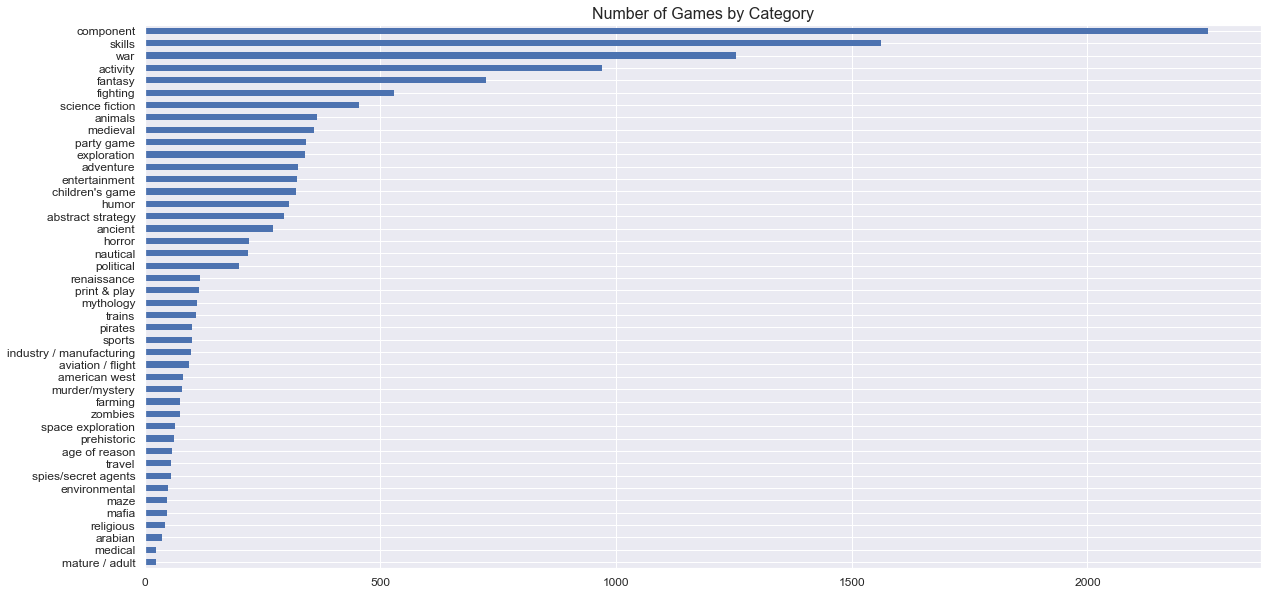

In [22]:
plot_bar(data=df,
         prefix='category_',
         figsize=(20,10),
         title='Number of Games by Category')

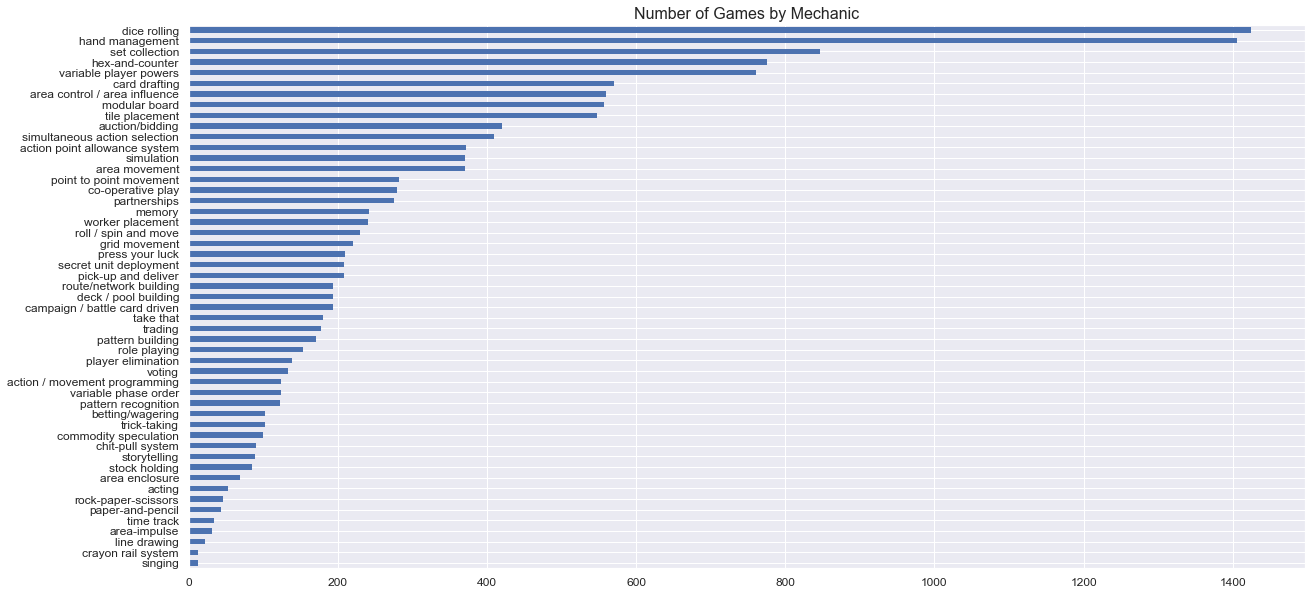

In [23]:
plot_bar(data=df,
         prefix='mechanic_',
         figsize=(20,10),
         title='Number of Games by Mechanic')

In [24]:
# Current data shape
df.shape

(5608, 109)

## 3. Data Cleaning and Engineering: Numeric Data

In [25]:
# Select numeric data that are not binary
numeric_df = df.loc[:, ~df.isin([0,1]).all()]
numeric_df.shape

(5608, 14)

In [26]:
# Some statistics
numeric_df.describe()

,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated,num_artist,num_category,num_designer,num_mechanic,num_publisher
count,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000
mean,5.010521,105.758559,9.955599,2.059379,91.313302,105.758559,2004.717725,6.546314,1166.660663,2.203994,2.651926,1.411733,2.600927,2.824893
std,7.543777,866.538797,3.301289,0.674542,848.267125,866.538797,11.284651,0.775103,3548.581155,7.690679,1.300462,0.802652,1.501255,3.683774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1951.000000,2.339400,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,30.000000,8.000000,2.000000,30.000000,30.000000,2001.000000,6.051200,100.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,2009.000000,6.548855,237.000000,1.000000,2.000000,1.000000,2.000000,2.000000
75%,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,2013.000000,7.065962,755.250000,2.000000,3.000000,2.000000,3.000000,3.000000
max,362.000000,60000.000000,25.000000,9.000000,60000.000000,60000.000000,2016.000000,9.003920,67655.000000,510.000000,14.000000,11.000000,12.000000,92.000000


In [27]:
# Select non zero rows only
df = df[(df.iloc[:,:6] > 0).all(axis=1)]

In [28]:
# Create game age variable from year published
df['game_age'] = 2019 - df['year_published']

# Drop unuseful columns
df.drop(['max_playtime', 'min_playtime', 'users_rated'], axis=1, inplace=True)

In [29]:
# Select data again
numeric_df = df.loc[:, ~df.isin([0,1]).all()]

# Current data shape
numeric_df.shape

(5240, 12)

In [30]:
# Check statistics again
numeric_df.describe()

,max_players,min_age,min_players,playing_time,year_published,average_rating,num_artist,num_category,num_designer,num_mechanic,num_publisher,game_age
count,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000
mean,5.102290,10.471756,2.070611,101.502481,2004.554008,6.525332,2.213550,2.663740,1.406870,2.624046,2.909542,14.445992
std,7.753493,2.441990,0.666585,858.286053,11.397775,0.765409,7.936809,1.316168,0.794444,1.512648,3.783639,11.397775
min,1.000000,2.000000,1.000000,1.000000,1951.000000,2.339400,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,4.000000,8.000000,2.000000,30.000000,2000.000000,6.036300,1.000000,2.000000,1.000000,1.000000,1.000000,6.000000
50%,4.000000,10.000000,2.000000,45.000000,2009.000000,6.525335,1.000000,2.000000,1.000000,2.000000,2.000000,10.000000
75%,6.000000,12.000000,2.000000,90.000000,2013.000000,7.032407,2.000000,3.000000,2.000000,3.000000,3.000000,19.000000
max,362.000000,25.000000,9.000000,60000.000000,2016.000000,9.003920,510.000000,14.000000,11.000000,12.000000,92.000000,68.000000


In [31]:
# Create a functions to plot multiple bar charts
def hist_loop(data: pd.DataFrame,
              rows: int,
              cols: int,
              figsize: tuple):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{sorted(data.columns)[i]} distribution', fontsize=10)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()

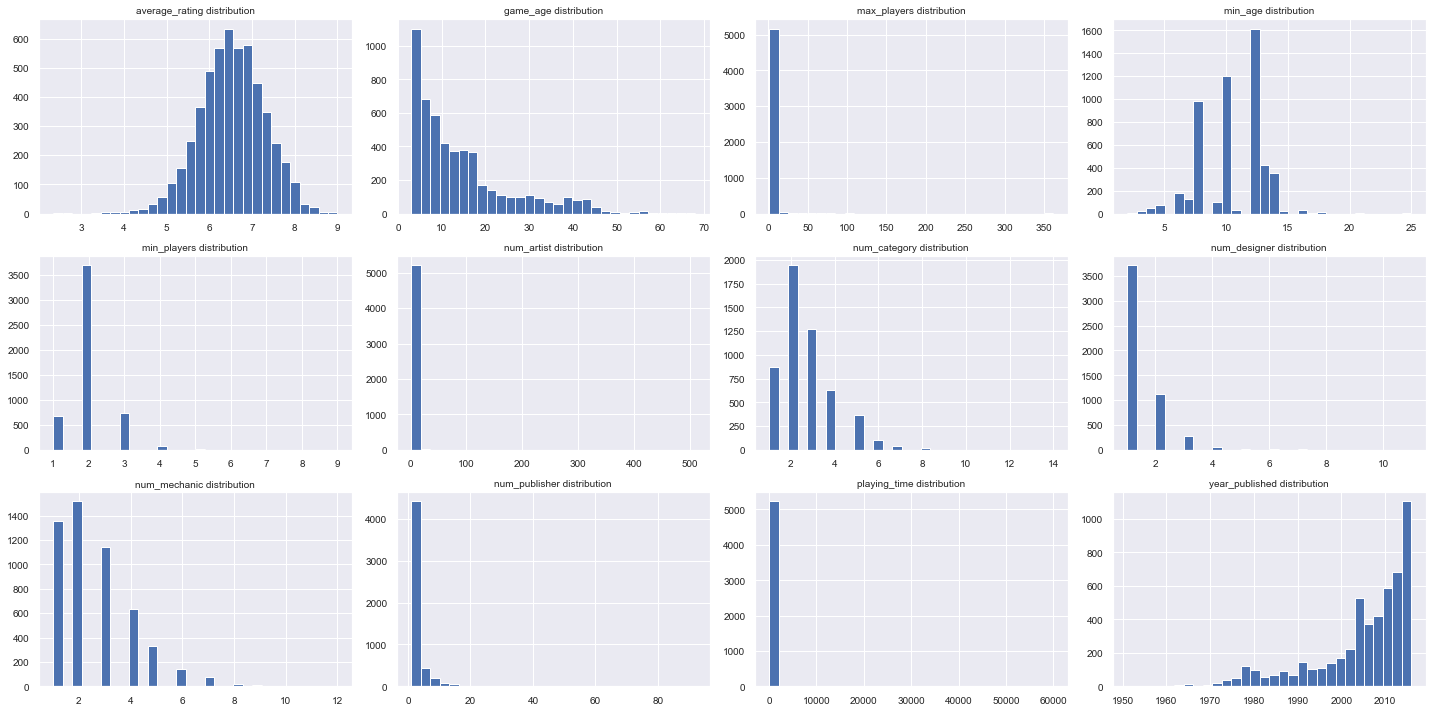

In [32]:
hist_loop(data=numeric_df,
          rows=3,
          cols=4,
          figsize=(20,10))

In [33]:
# Create a function to check skewness
def skew_df(data: pd.DataFrame, skew_limit: float) -> pd.DataFrame:
    # Define a limit above which we will log transform
    skew_vals = data.skew()

    # Showing the skewed columns
    skew_cols = (skew_vals
                 .sort_values(ascending=False)
                 .to_frame('Skew')
                 .query('abs(Skew) > {}'.format(skew_limit))
    )
    return skew_cols

In [34]:
# Print out skewed columns
skew_cols = skew_df(numeric_df, 0.75)
skew_cols

,Skew
playing_time,65.229893
num_artist,51.670589
max_players,24.374155
num_publisher,7.440751
num_designer,3.308256
min_players,2.043046
game_age,1.437833
num_mechanic,1.186188
num_category,1.110221
year_published,-1.437833


### Log transformation for skewed variables

In [35]:
# Perform log transformation
for col in skew_cols.index.values:
    numeric_df['log_' + col] = numeric_df[col].apply(np.log1p)

<ipython-input-35-8c9283d1fd55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['log_' + col] = numeric_df[col].apply(np.log1p)


In [36]:
# Check skewness on log transformed data
log_df = numeric_df.filter(regex='^log_', axis=1)
skew_log_cols = skew_df(log_df, 0.75)
skew_log_cols

,Skew
log_num_artist,2.491281
log_num_designer,1.770511
log_max_players,1.379365
log_num_publisher,1.361302
log_year_published,-1.451667


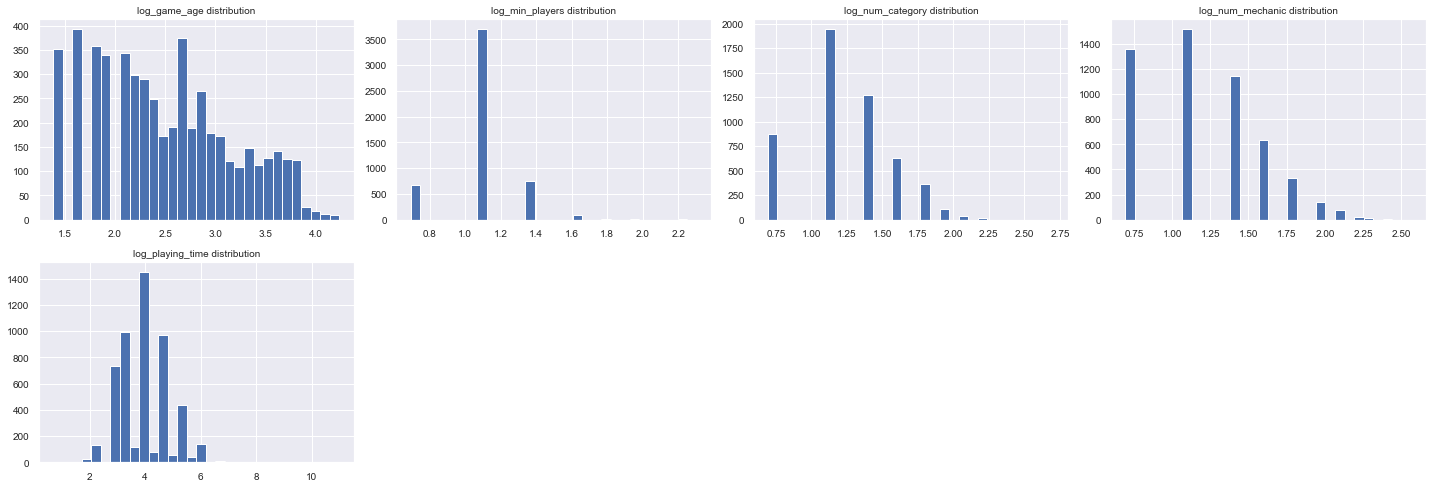

In [37]:
# Plot log columns that have nearly normal distribution
log_df = log_df.drop(skew_log_cols.index, axis=1)
hist_loop(data=log_df.copy(),
          rows=3,
          cols=4,
          figsize=(20,10))

In [38]:
# Join these new columns to our dataset
df = df.join(log_df).drop([x.replace('log_', '') for x in log_df.columns], axis=1)

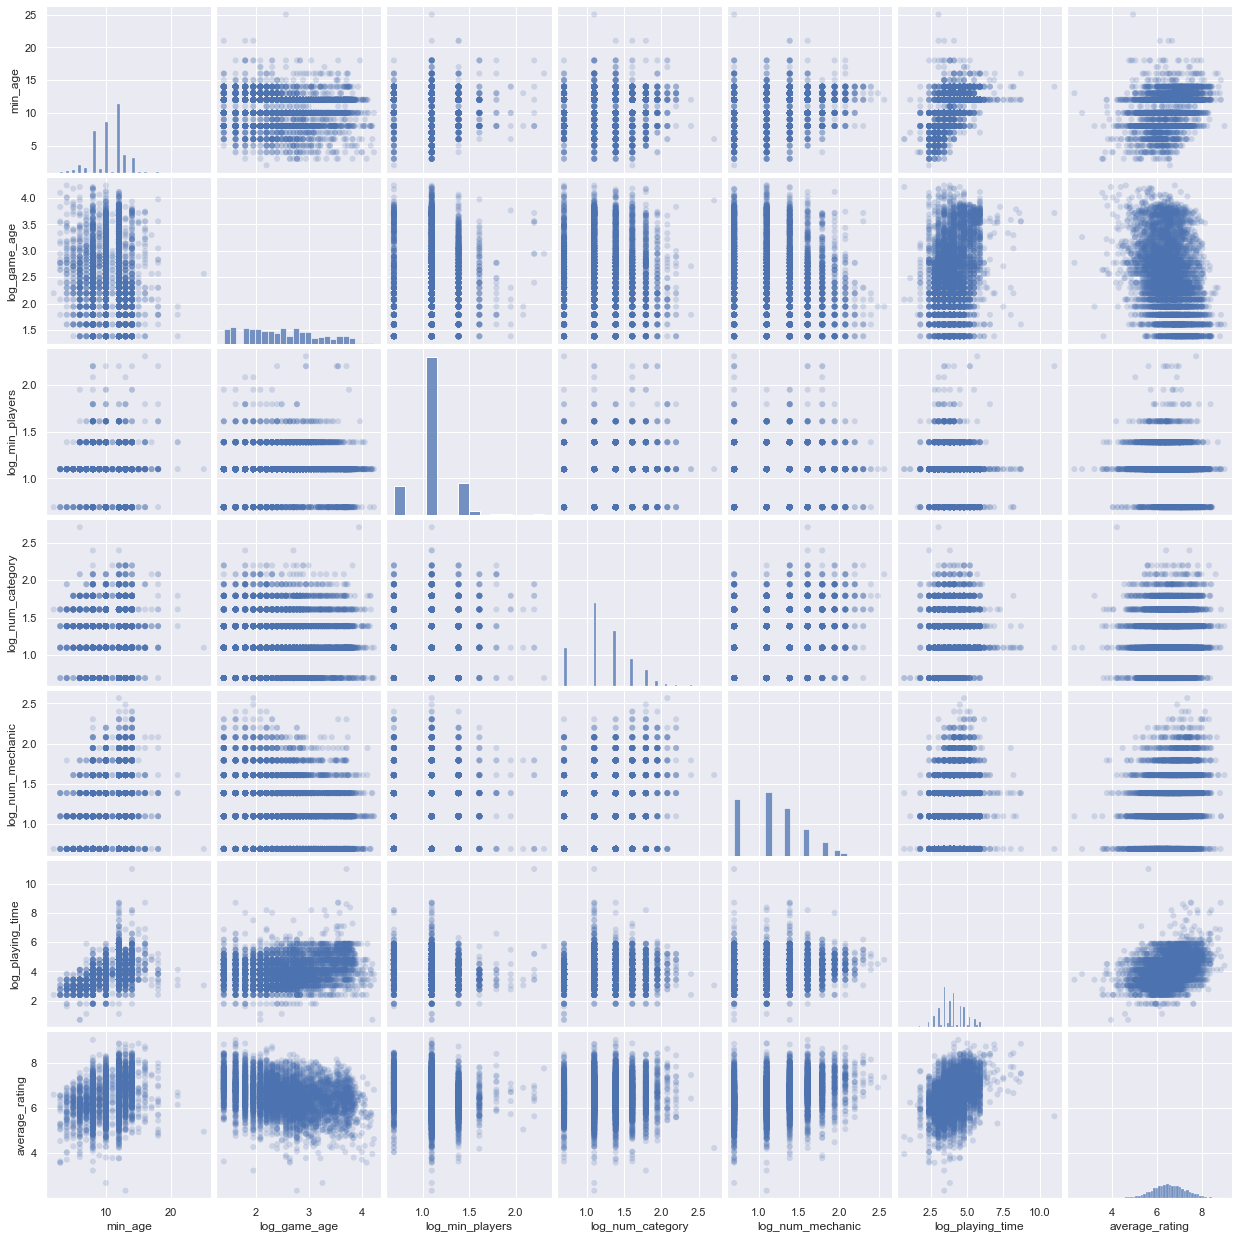

In [39]:
# Pairplot of numeric data
sns.pairplot(data=df, vars=['min_age', 'log_game_age', 'log_min_players', 'log_num_category',
                            'log_num_mechanic', 'log_playing_time', 'average_rating'],
             plot_kws=dict(alpha=.2, edgecolor='none'));

Observations from this plot:
- The target (average_rating) has a normal distribution.
- No strong linear relationship between the features and the target. Linear regression might not be well-suited to this problem.
- There might be a relationship between minimum age and playing time.
- I can try adding polynomial and interaction terms and examine their correlation with the target.

### Adding polynomial and interaction terms

In [40]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate and provide desired degree; 
# Note: degree=2 also includes intercept, degree 1 terms, and cross-terms
pf = PolynomialFeatures(degree=2)

In [41]:
# Select features
feature_cols = ['min_age', 'log_game_age', 'log_min_players', 'log_num_category',
                'log_num_mechanic', 'log_playing_time']
features = df[feature_cols]

# fit and transform
pf.fit(features)
feat_array = pf.transform(features)

# Create a data frame
feat_df = pd.DataFrame(feat_array,
                       index=df.index,
                       columns=pf.get_feature_names(input_features=features.columns))

# Drop the intercept
feat_df.drop('1', axis=1, inplace=True)

# Add in the target
feat_df.insert(0, 'average_rating', df['average_rating'])

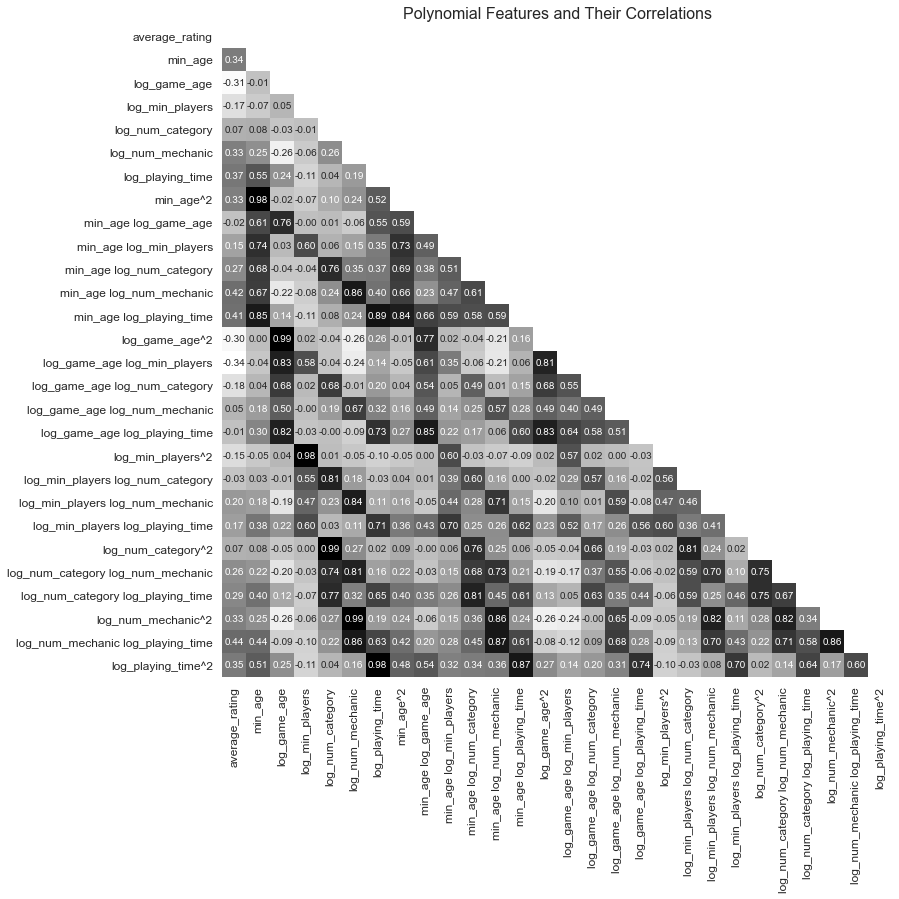

In [42]:
# Plot a heatmap of correlations
with sns.axes_style('white'):
    fig, axes = plt.subplots(figsize=(12,12))
    mask = np.triu(np.ones_like(feat_df.corr(), dtype=bool))
    sns.heatmap(feat_df.corr(),
                mask=mask,
                cmap='binary',
                cbar=False,
                annot=True,
                annot_kws={'size':10},
                fmt='.2f')
    plt.title('Polynomial Features and Their Correlations', fontsize=16)
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

This plot shows that polynomial and interaction terms do not have significantly higher correlations with the target comparing to the original features.

In [43]:
# Join these new columns to our dataset
for col in feat_df.columns:
    if col in df.columns:
        feat_df.drop(col, axis=1, inplace=True)
df = df.join(feat_df)

### Binning numeric data

- Binning numeric data that cannot be scaled by log transformation
- Dummy transformation

In [44]:
# Number of artists
pd.qcut(df['num_artist'], q=4, duplicates='drop')

6168    (0.999, 2.0]
9652    (0.999, 2.0]
5007    (0.999, 2.0]
7409    (0.999, 2.0]
3030    (0.999, 2.0]
            ...     
7891    (0.999, 2.0]
9225    (2.0, 510.0]
4859    (0.999, 2.0]
9845    (0.999, 2.0]
2732    (0.999, 2.0]
Name: num_artist, Length: 5240, dtype: category
Categories (2, interval[float64]): [(0.999, 2.0] < (2.0, 510.0]]

In [45]:
df['group_artist'] = pd.qcut(df['num_artist'],
                             q=4,
                             duplicates='drop',
                             labels=['two_or_less', 'three_or_more'])
df.drop('num_artist', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['group_artist'], drop_first=True)

In [46]:
# Number of designers
pd.qcut(df['num_designer'], q=4, duplicates='drop')

6168    (0.999, 2.0]
9652    (0.999, 2.0]
5007    (0.999, 2.0]
7409    (0.999, 2.0]
3030    (0.999, 2.0]
            ...     
7891    (0.999, 2.0]
9225     (2.0, 11.0]
4859    (0.999, 2.0]
9845    (0.999, 2.0]
2732    (0.999, 2.0]
Name: num_designer, Length: 5240, dtype: category
Categories (2, interval[float64]): [(0.999, 2.0] < (2.0, 11.0]]

In [47]:
df['group_designer'] = pd.qcut(df['num_designer'],
                               q=4,
                               duplicates='drop',
                               labels=['two_or_less', 'three_or_more'])
df.drop('num_designer', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['group_designer'], drop_first=True)

In [48]:
# Number of publishers
pd.qcut(df['num_publisher'], q=4, duplicates='drop')

6168      (2.0, 3.0]
9652     (3.0, 92.0]
5007     (3.0, 92.0]
7409    (0.999, 2.0]
3030    (0.999, 2.0]
            ...     
7891    (0.999, 2.0]
9225    (0.999, 2.0]
4859      (2.0, 3.0]
9845     (3.0, 92.0]
2732    (0.999, 2.0]
Name: num_publisher, Length: 5240, dtype: category
Categories (3, interval[float64]): [(0.999, 2.0] < (2.0, 3.0] < (3.0, 92.0]]

In [49]:
pd.qcut(df['num_publisher'], q=3, duplicates='drop')

6168    (0.999, 3.0]
9652     (3.0, 92.0]
5007     (3.0, 92.0]
7409    (0.999, 3.0]
3030    (0.999, 3.0]
            ...     
7891    (0.999, 3.0]
9225    (0.999, 3.0]
4859    (0.999, 3.0]
9845     (3.0, 92.0]
2732    (0.999, 3.0]
Name: num_publisher, Length: 5240, dtype: category
Categories (2, interval[float64]): [(0.999, 3.0] < (3.0, 92.0]]

In [50]:
df['group_publisher'] = pd.qcut(df['num_publisher'],
                                q=3,
                                duplicates='drop',
                                labels=['three_or_less', 'four_or_more'])
df.drop('num_publisher', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['group_publisher'], drop_first=True)

In [51]:
# Number of maximum players
pd.qcut(df['max_players'], q=4, duplicates='drop')

6168      (4.0, 6.0]
9652      (4.0, 6.0]
5007      (4.0, 6.0]
7409      (4.0, 6.0]
3030    (0.999, 4.0]
            ...     
7891      (4.0, 6.0]
9225      (4.0, 6.0]
4859      (4.0, 6.0]
9845      (4.0, 6.0]
2732    (6.0, 362.0]
Name: max_players, Length: 5240, dtype: category
Categories (3, interval[float64]): [(0.999, 4.0] < (4.0, 6.0] < (6.0, 362.0]]

In [52]:
df['group_max_players'] = pd.qcut(df['max_players'],
                                  q=4,
                                  duplicates='drop',
                                  labels=['four_or_less', 'five_or_six', 'seven_or_more'])
df.drop('max_players', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['group_max_players'], drop_first=True)

In [53]:
# Year published
pd.qcut(df['year_published'], q=4, duplicates='drop')

6168      (2000.0, 2009.0]
9652      (2013.0, 2016.0]
5007      (2000.0, 2009.0]
7409      (2009.0, 2013.0]
3030    (1950.999, 2000.0]
               ...        
7891      (2009.0, 2013.0]
9225      (2013.0, 2016.0]
4859      (2000.0, 2009.0]
9845      (2013.0, 2016.0]
2732    (1950.999, 2000.0]
Name: year_published, Length: 5240, dtype: category
Categories (4, interval[float64]): [(1950.999, 2000.0] < (2000.0, 2009.0] < (2009.0, 2013.0] < (2013.0, 2016.0]]

In [54]:
df['group_year_published'] = pd.qcut(df['year_published'],
                                     q=4,
                                     duplicates='drop',
                                     labels=['before_2001', 'between_2001_and_2009', 'between_2010_and_2013', 'between_2014_and_2016'])
df.drop('year_published', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['group_year_published'], drop_first=True)

In [55]:
# Final dataset
df.head()

,min_age,average_rating,category_children's game,category_science fiction,category_humor,category_maze,category_spies/secret agents,category_nautical,category_arabian,category_abstract strategy,...,log_num_mechanic log_playing_time,log_playing_time^2,group_artist_three_or_more,group_designer_three_or_more,group_publisher_four_or_more,group_max_players_five_or_six,group_max_players_seven_or_more,group_year_published_between_2001_and_2009,group_year_published_between_2010_and_2013,group_year_published_between_2014_and_2016
6168,12,6.97479,0,0,0,0,0,0,0,0,...,5.698881,16.899284,0,0,0,1,0,1,0,0
9652,8,6.75647,0,0,0,0,0,0,0,0,...,3.344750,9.269117,0,0,1,1,0,0,0,1
5007,12,6.92051,0,0,0,0,0,0,0,0,...,8.592903,22.999607,0,0,1,1,0,1,0,0
7409,8,6.09375,0,0,0,0,0,0,0,0,...,3.772621,11.792268,0,0,0,1,0,0,1,0
3030,12,6.05192,0,0,0,0,0,1,0,0,...,5.268714,22.999607,0,0,0,0,0,0,0,0


In [56]:
df.shape

(5240, 131)

## 4. Hypothesis Testing

In [57]:
from scipy.stats import ttest_ind, t

In [58]:
# Create a function to conduct Welch's test and plot distributions
def t_ind_test(s1: pd.Series,
               s2: pd.Series,
               equal_var=False) -> tuple:
    """
    Returns t-value and p-value
    """

    dfreedom = len(s1) + len(s2) - 2
    t_val, p_val = ttest_ind(s1, s2, equal_var=equal_var)
    return t_val, p_val

def test_loop(data: pd.DataFrame,
              prefix: str) -> pd.DataFrame:
    """
    Returns a table of t test result sorted by p-values 
    with colored bars (green for positive values and red for negative ones)
    """

    category_df = data.filter(regex=prefix, axis=1)
    category = sorted(list(category_df.columns))

    test_results = []
    for i in category:
        non_category_ratings = data[data[i] == 0]['average_rating']
        category_ratings = data[data[i] == 1]['average_rating']
        test_results.append((i.replace(prefix, ''),) + t_ind_test(category_ratings, non_category_ratings))

    test_results_df = (pd.DataFrame(test_results, columns=[prefix + 'name', 't-value', 'p-value'])
                       .sort_values('p-value')
                       .set_index(prefix + 'name')
    )
    test_results_df = test_results_df.style.bar(align='mid', color=['#d65f5f', '#5fba7d'])
    return test_results_df

In [59]:
test_loop(df, 'category_')

,t-value,p-value
category_name,,
children's game,-15.841916,0.000000
war,13.893726,0.000000
component,-10.584794,0.000000
humor,-9.138182,0.000000
party game,-7.005245,0.000000
animals,-6.487482,0.000000
trains,4.741813,0.000006
renaissance,4.690531,0.000007
activity,4.241476,0.000024


In [60]:
test_loop(df, 'mechanic_')

,t-value,p-value
mechanic_name,,
area control / area influence,13.681888,0.000000
worker placement,12.531980,0.000000
simulation,11.917241,0.000000
variable player powers,11.257887,0.000000
deck / pool building,11.228836,0.000000
roll / spin and move,-10.953231,0.000000
action point allowance system,8.988847,0.000000
grid movement,9.043836,0.000000
dice rolling,8.376262,0.000000


In [61]:
test_loop(df, 'group_')

,t-value,p-value
group_name,,
year_published_between_2014_and_2016,21.686049,0.000000
artist_three_or_more,10.349241,0.000000
year_published_between_2001_and_2009,-9.785744,0.000000
max_players_five_or_six,-9.068495,0.000000
publisher_four_or_more,6.625750,0.000000
year_published_between_2010_and_2013,5.153826,0.000000
designer_three_or_more,2.842000,0.004688
max_players_seven_or_more,-2.561497,0.010632
